In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\swasa\\Desktop\\train.csv')

In [3]:
df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


<AxesSubplot:xlabel='customer_category', ylabel='count'>

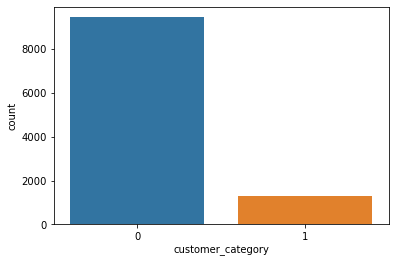

In [4]:
sns.countplot('customer_category',data = df)

In [5]:
df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [6]:
df.shape

(10738, 12)

In [7]:
df['customer_product_search_score'].head()

0    9.447662
1    7.329056
2    5.143676
3    4.917740
4    4.237073
Name: customer_product_search_score, dtype: float64

In [8]:
df['customer_product_search_score'] = df['customer_product_search_score'].fillna(df['customer_product_search_score'].mean())
df['customer_stay_score'] = df['customer_stay_score'].fillna(df['customer_stay_score'].mean())
df['customer_product_variation_score'] = df['customer_product_variation_score'].fillna(df['customer_product_variation_score'].mean())
df['customer_order_score'] = df['customer_order_score'].fillna(df['customer_order_score'].mean())

In [9]:
df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score        0
customer_ctr_score                   0
customer_stay_score                  0
customer_frequency_score             0
customer_product_variation_score     0
customer_order_score                 0
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [10]:
df['customer_active_segment']= df['customer_active_segment'].fillna(df['customer_active_segment'].mode()[0])
df['X1'] = df['X1'].fillna(df['X1'].mode()[0])

In [11]:
df.isnull().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

<AxesSubplot:xlabel='customer_active_segment', ylabel='count'>

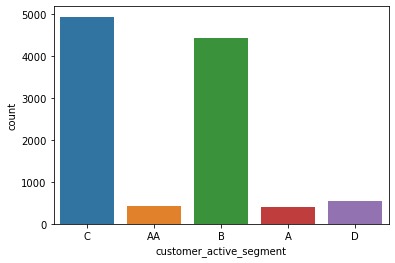

In [12]:
sns.countplot(df['customer_active_segment'])

<AxesSubplot:xlabel='X1', ylabel='count'>

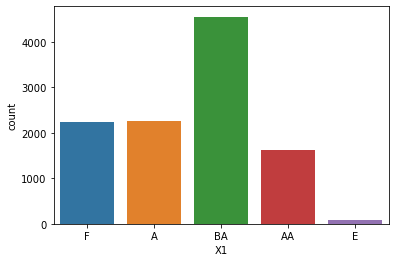

In [13]:
sns.countplot(df['X1'])

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['customer_active_segment'] = label_encoder.fit_transform(df['customer_active_segment'])
df['X1'] = label_encoder.fit_transform(df['X1'])

<AxesSubplot:>

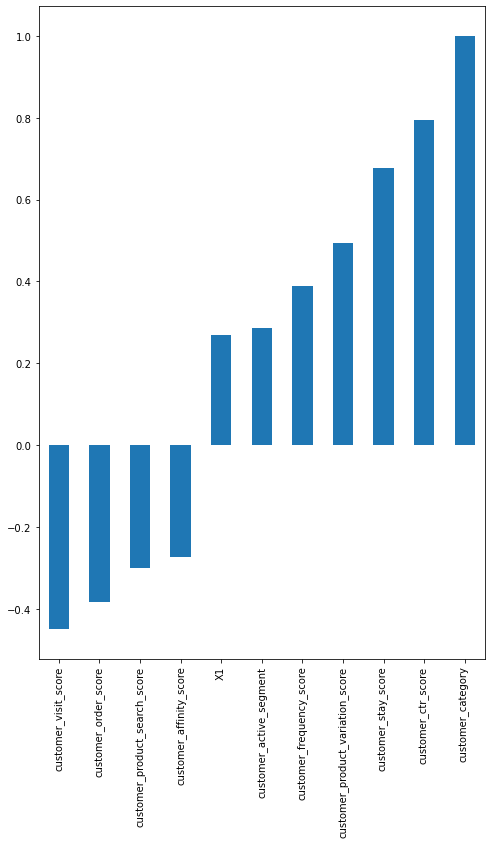

In [15]:
# checking the corelation with bar graph
plt.figure(figsize = (8,12))
df.corr()['customer_category'].sort_values().plot(kind ='bar')

In [16]:
X = df.drop(['customer_id','customer_visit_score','customer_order_score','customer_product_search_score','customer_affinity_score','customer_category'], axis = 1)
y = df['customer_category']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [18]:
from collections import Counter
from imblearn.combine import SMOTETomek
st=SMOTETomek(0.75)
X_train_st,y_train_st=st.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 2830, 1: 391})
The number of classes after fit Counter({0: 2807, 1: 2099})


E:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_st,y_train_st)

RandomForestClassifier()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
pred=classifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[6465  148]
 [  95  809]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6613
           1       0.85      0.89      0.87       904

    accuracy                           0.97      7517
   macro avg       0.92      0.94      0.93      7517
weighted avg       0.97      0.97      0.97      7517



In [21]:
test_data = pd.read_csv('C:\\Users\\swasa\\Desktop\\test.csv')

In [22]:
test_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [23]:
test_data.shape

(7160, 11)

In [24]:
test_data['customer_product_search_score'] = test_data['customer_product_search_score'].fillna(test_data['customer_product_search_score'].mean())
test_data['customer_stay_score'] = test_data['customer_stay_score'].fillna(test_data['customer_stay_score'].mean())
test_data['customer_product_variation_score'] = test_data['customer_product_variation_score'].fillna(test_data['customer_product_variation_score'].mean())
test_data['customer_order_score'] = test_data['customer_order_score'].fillna(test_data['customer_order_score'].mean())

In [25]:
test_data['customer_active_segment']= test_data['customer_active_segment'].fillna(test_data['customer_active_segment'].mode()[0])
test_data['X1'] = test_data['X1'].fillna(test_data['X1'].mode()[0])

In [26]:
test_data['customer_active_segment'] = label_encoder.fit_transform(test_data['customer_active_segment'])
test_data['X1'] = label_encoder.fit_transform(test_data['X1'])

In [27]:
test_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2


In [31]:
X_test_data = test_data.drop(['customer_id','customer_visit_score','customer_order_score','customer_product_search_score','customer_affinity_score'], axis = 1)

In [32]:
prediction=classifier.predict(X_test_data)

In [33]:
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
customer_category = pd.Series(prediction)

In [35]:
x_df = pd.DataFrame(customer_category,columns = ['customer_category'])

In [36]:
pd.concat([
    pd.concat([test_data['customer_id'], x_df], axis=1)]).to_csv('result.csv')